Morphlogy

In [2]:
import cv2
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#specific color from image
# red     = red_plane-gray
# green   = green_plane-gray
# blue    = blue_plane-gray
# cyan    = gray-red_plane
# magneta = gray-green_plane
# yellow  = gray-blue_plane

(1500, 2000, 3)

In [3]:
img1= cv2.imread("pic4.jpg")
img1.shape

(837, 1600, 3)

In [4]:
img1[:,:,-1].shape


(837, 1600)

In [5]:
gray =cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
red_plane=img1[:,:,-1].copy()
green_plane=img1[:,:,-2].copy()
blue_plane=img1[:,:,-3].copy()

In [12]:
red_color = cv2.subtract(red_plane,gray)
green_color = cv2.subtract(green_plane,gray)
blue_color = cv2.subtract(blue_plane,gray)
yellow_color = cv2.subtract(gray,blue_plane)
magneta_color = cv2.subtract(gray,green_plane)
cyan_color = cv2.subtract(gray,red_plane)

In [19]:
def imshow(im,title,type='',):
    if type:
        plt.imshow(im,cmap=type)
    else:
        plt.imshow(im)
    plt.title(title)
    plt.axis('off')

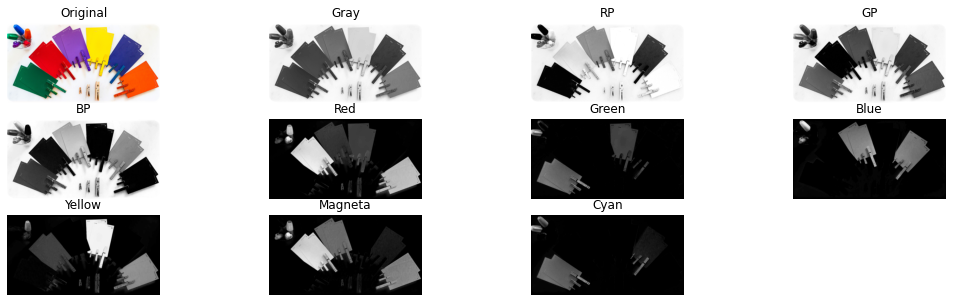

In [20]:
plt.figure(figsize=(18,5))
plt.subplot(3,4,1); imshow(img1[:,:,::-1],'Original')
plt.subplot(3,4,2); imshow( gray ,'Gray','gray')
plt.subplot(3,4,3); imshow(red_plane,'RP','gray')
plt.subplot(3,4,4); imshow(green_plane,'GP','gray')
plt.subplot(3,4,5); imshow(blue_plane,'BP','gray')
plt.subplot(3,4,6); imshow(red_color,'Red','gray')
plt.subplot(3,4,7); imshow(green_color,'Green','gray')
plt.subplot(3,4,8); imshow(blue_color,'Blue','gray')
plt.subplot(3,4,9); imshow(yellow_color,'Yellow','gray')
plt.subplot(3,4,10); imshow(magneta_color,'Magneta','gray')
plt.subplot(3,4,11); imshow(cyan_color,'Cyan','gray')
plt.show()


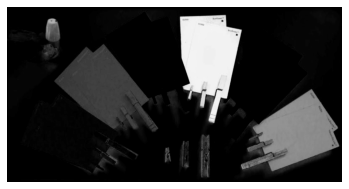

In [24]:
imshow(yellow_color,'','gray')

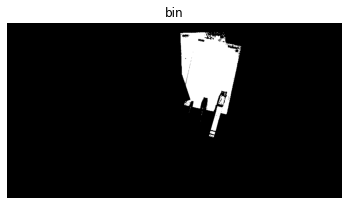

In [48]:
th, y_bw=cv2.threshold(yellow_color,200,255,cv2.THRESH_BINARY)
imshow(y_bw,'bin','gray')

In [49]:
rp=ski.measure.regionprops(y_bw)
len(rp)


1

In [50]:
rp0=rp[0]
y1,x1,y2,x2 = rp0.bbox

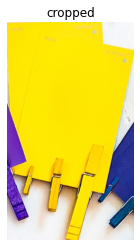

In [51]:
img_cropped=img1[y1:y2, x1:x2,:].copy()
imshow(img_cropped[:,:,::-1],'cropped')

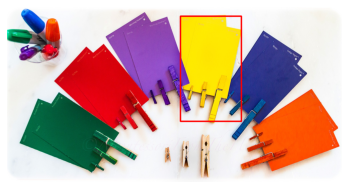

In [52]:
img_copy=img1.copy()
cv2.rectangle(img_copy,(x1,y1),(x2,y2),color=[0,0,255],thickness=5)
imshow(img_copy[:,:,::-1],'')